In [2]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [3]:
def osc(y_v,t,omega=1.):
    #y_v son las variables y,v
    dy = y_v[1]
    dv = -omega*y_v[0]-0.01*y_v[1]+0.5*sin(2*t)
    return array([dy,dv])

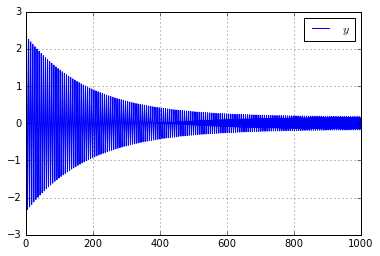

In [4]:
t = linspace(0,1000,10000)
ini = array([0.1,2.])
sol = odeint(osc,ini,t)
plot(t,sol[:,0],label="$y$")
 #plot(t,sol[:,1],label="$v_y$")
grid(True),legend()
show()

In [5]:
ind = 49
ti,pto_i = t[ind],sol[ind]
error = 1e-5
while abs (pto_i[0])>error:
    tip1 = ti - (pto_i[0]/pto_i[1])
    paso = odeint(osc,pto_i,[ti,tip1])
    ti,pto_i = tip1,paso[-1]
print ti,pto_i

6.23309345576 [ -3.19402167e-09   1.93248781e+00]


In [6]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs (pto_i[0])>error:
            tip1 = ti - (pto_i[0]/pto_i[1])
            paso = odeint(osc,pto_i,[ti,tip1])
            ti,pto_i = tip1,paso[-1]
    return ti,pto_i

In [7]:
ind = 10
ti,pto_i = t[ind],sol[ind]
t_raiz,punto = root_trayec(osc,pto_i,ti)
print t_raiz,punto

-0.0499366558903 [ -2.08761560e-06   2.00474354e+00]


In [8]:
num = len(t)
raices = zeros(num)
puntos = zeros ((num,2))
j=0 
for i in range(len(t)-1):
    if(sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j]= root_trayec(osc,sol[i],t[i])
        j+=1
raices = raices[0:j],puntos[0:j]
print raices
#rint puntos

(array([   3.10338483,    6.23309336,    9.38677862,   12.5161091 ,
         15.67017522,   18.79912192,   21.95357466,   25.08212046,
         28.23697689,   31.3651076 ,   34.52038499,   37.64808269,
         40.80378958,   43.93104536,   47.08720025,   50.21399303,
         53.37061377,   56.49693005,   59.65403015,   62.77985061,
         65.93744943,   69.06275513,   72.2208736 ,   75.34564309,
         78.5042966 ,   81.62851345,   84.78772456,   87.91136443,
         91.07115536,   94.19419595,   97.35458912,  100.47700567,
        103.63802569,  106.75979281,  109.92146639,  113.04255532,
        116.20490757,  119.32528587,  122.48835282,  125.60800067,
        128.77180087,  131.89067921,  135.05525176,  138.17332586,
        141.3387055 ,  144.45593749,  147.62216253,  150.73851185,
        153.90562113,  157.02104448,  160.18908299,  163.30353592,
        166.47254751,  169.58597864,  172.75601464,  175.86836951,
        179.03948432,  182.15070416,  185.3229567 ,  188.4329